In [ ]:
!pip install statsmodels --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv('/content/shampoo.xls', usecols=[1], names=['sales'], skiprows=1)

In [ ]:
df.index = pd.date_range(start='2000-01-01',periods=len(df),freq='M')

<ipython-input-6-78ff1abc2fd6>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.index = pd.date_range(start='2000-01-01',periods=len(df),freq='M')


In [ ]:
df

,sales
2000-01-31,266.0
2000-02-29,145.9
2000-03-31,183.1
2000-04-30,119.3
2000-05-31,180.3
2000-06-30,168.5
2000-07-31,231.8
2000-08-31,224.5
2000-09-30,192.8
2000-10-31,122.9


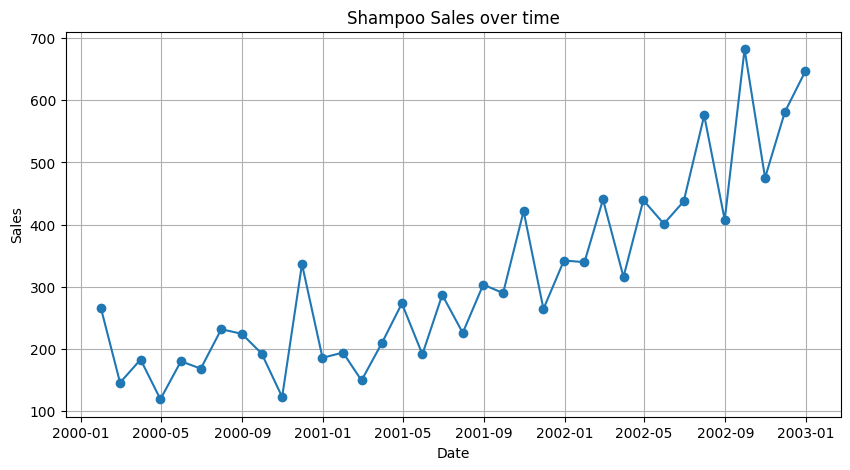

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['sales'], marker='o', linestyle='-')
plt.title('Shampoo Sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [ ]:
result = adfuller(df['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 3.060142083641181
p-value: 1.0
Critical Values: {'1%': np.float64(-3.7238633119999998), '5%': np.float64(-2.98648896), '10%': np.float64(-2.6328004)}


In [ ]:
df = df.iloc[1:]
df = df[df['sales'] != 'Sales']
df.reset_index(drop=True, inplace=True)
result = adfuller(df['sales'].astype(float))
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 2.8832667186347365
p-value: 1.0
Critical Values: {'1%': np.float64(-3.7377092158564813), '5%': np.float64(-2.9922162731481485), '10%': np.float64(-2.635746736111111)}


In [ ]:
df

,sales
0,145.9
1,183.1
2,119.3
3,180.3
4,168.5
5,231.8
6,224.5
7,192.8
8,122.9
9,336.5


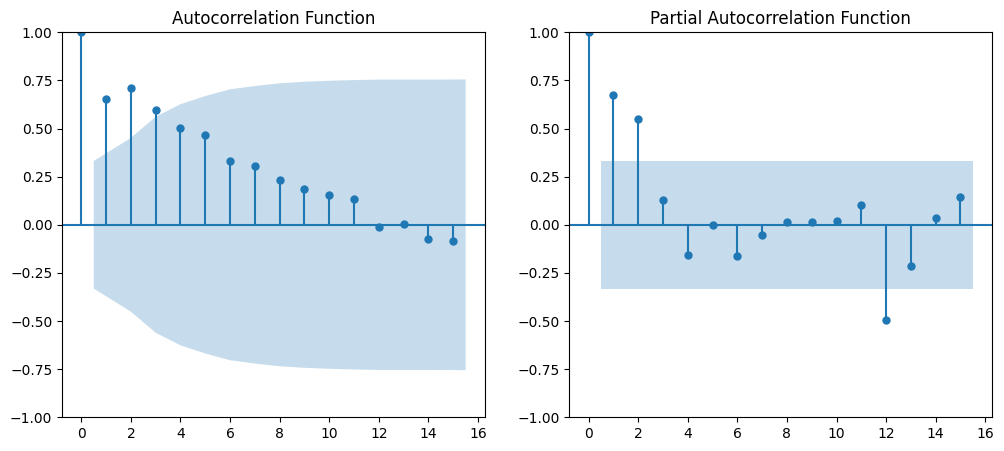

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
plot_acf(df, lags=15,ax=axes[0])
plot_pacf(df, lags=15,method='ywadjusted',ax=axes[1])
axes[0].set_title('Autocorrelation Function')
axes[1].set_title('Partial Autocorrelation Function')
plt.show()

In [ ]:
model = ARIMA(df,order=(5,1,0))
model_fit = model.fit()


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -191.610
Date:                Sun, 30 Mar 2025   AIC                            395.219
Time:                        05:25:10   BIC                            404.377
Sample:                             0   HQIC                           398.342
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9061      0.226     -4.015      0.000      -1.348      -0.464
ar.L2         -0.2389      0.248     -0.962      0.336      -0.726       0.248
ar.L3          0.1150      0.271      0.425      0.6

In [ ]:
forecast_setps = 12
forecast = model_fit.forecast(steps=forecast_setps)

<ipython-input-16-bdea27acbde6>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_setps+1,freq="M")[1:], forecast, label='Forecast' , color='red')


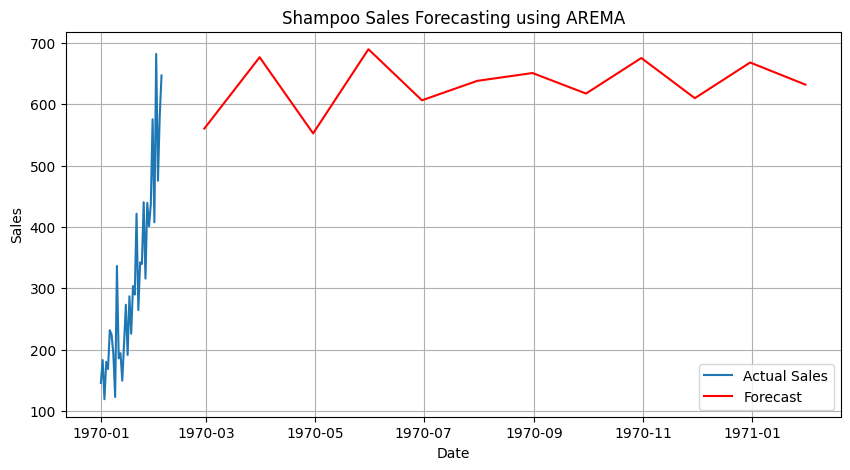

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sales'], label='Actual Sales')
plt.plot(pd.date_range(df.index[-1], periods=forecast_setps+1,freq="M")[1:], forecast, label='Forecast' , color='red')
plt.title('Shampoo Sales Forecasting using AREMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

WALK FORWARD AREMA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/shampoo.xls', header=0,parse_dates=[0])

<ipython-input-18-fc3fabdf5a46>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/shampoo.xls', header=0,parse_dates=[0])


In [ ]:
data = df['Sales'].values

In [ ]:
train_size = int(len(data)* 0.8)
train, test = data[:train_size],data[train_size:]

In [ ]:
history = train.tolist()
predictions = []
for t in test:
  model = ARIMA(history, order=(5, 1, 0))
  model_fit = model.fit()

  y_pred = model_fit.predict(start=len(history), end=len(history))[0]
  predictions.append(y_pred)
  history.append(t)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test,predictions))
print(f'Walk-Forward Validation RMSE: {rmse:.4f}')

Walk-Forward Validation RMSE: 105.8127


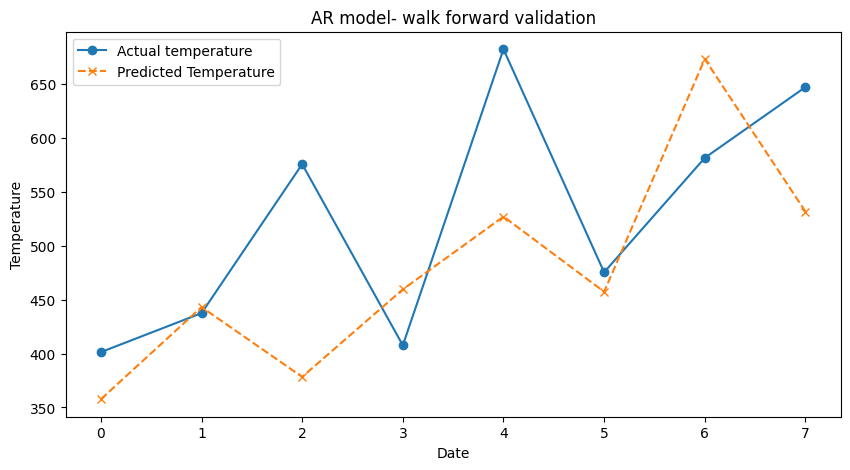

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test, label='Actual temperature',marker='o')
plt.plot(predictions, label='Predicted Temperature',marker='x',linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title('AR model- walk forward validation')
plt.legend()
plt.show()